# HealthCare Fraud Detection Capstone Project Proposal
- **Fraud detection** is a well known practice in **machine learning**. 
- Given that **credit card frauds**, **insurance frauds**, **legal frauds**, ....., form multi-billions industry, it becomes an important sub-field of applied machine learning.

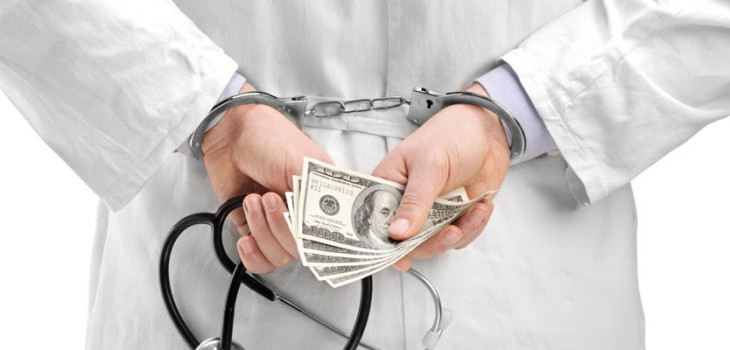

In [1]:
from IPython.display import Image
Image("elder-healthcare-fraud.jpg")

## What are the major difference between credit card frauds and health insurance frauds?
- **Credit card frauds** are often discovered eventually by the consumers. Thus it is much easier to produce good quality
labels of **fraud**, **non-fraud**. This allows the machine learning practitioners to apply **supervised** learning technique
to handle the task.
- On the other hand, **healthcare fraud** are over-charges by the clinics, hospitals toward the insurace companies by
submitting fake, fraudulent or fictitious insurance claims to 'steal' from the insurance companies.
- The patients, who often pay the copay, have no incentive or have no medical domain knowledge to spot the criminal 
activities done by the doctors/hospitals. This makes it very difficult to get realistic **fraud** or **non-fraud** labels.
- When the insurance companies as a whole suffer great losses due to the criminal activities, they have to improve
the insurance premiums to the patients.
- Thus, as a whole, the patients lose money by the over-chargings of medical professionals. But the loss in a single
health insurnace fraud is covered by all the customers (insured) of the insurance plan.
- In this proposal, we would like to study the **health insurance fraud** based on a kaggle data set, 
https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

### What are the major types of fraudulent healthcare frauds?
- Following the above kaggle link, there are several types of healthcare frauds.
   - Billing for services that were not provided.
   - Duplicate submission of a claim for the same service.
   - Misrepresenting the service provided.
   - Charging for a more complex or expensive service than was actually provided.
   - Billing for a covered service when the service actually provided was not covered.
- We may categorize the fraudulent claims to 
   - fabricate phantom claims mimicking the authentic ones.
   - mis-represent the nature of the authentic service either to make it more expensive or to make it covered.
- This has been identified based on manual work using data analytics.
- The disguise of non-covered service into a covered service benefits the 'patient'. 
- This is the same if the 'patient' supposely pays up front and get re-imbursed from the insurance company afterward.
This means the medical professionals team up with the 'patients' to trick the insurance company.
It could happen that the identity thefts in the criminal ring steal information from the patients to act as recipients of the fund.

### Introduction to the dataset
- The data consists of 
   - inpatient record, including the doctor IDs, provider IDs (clinic/hospital IDs), patient IDs, dignosis codes, operation code, re-imbursement information, etc.
   - outpatient record, with similar information as the above.
   - patient records with their pre-existing chronic conditions.
   - provider fraudulent flags. 
- The 'fraud' flag is on the provider, instead of on the medical doctors, or on the per record basis.
- Notice that most of the fradulent activies are yet to be discovered by the insurance companies. Thus the labels here
 do not represent convicted felonies. Instead, the flag is labelled to be 'possibly fraud', **potential fraud** without
    100% certainty.
- The **inpatient** train-data has about $40k$ records, while the larger **outpatient** train-data has about $520k$
records.
- There are $5.4k$ distinct hospitals which are labelled as either **potential fraud** or **not potential fraud**.
- The **potential fraud** medical providers occupy about $9\%$ of the total set of providers.
- The **potential fraud** labels do not distinquish the types of fraudulent activities it involves. So the offender could have
involves a single type or multiple types of healthcare fraud activities.
- The goal of the project is to uncover these fraudulent activities based on **supervised** or **unsupervised** learning.

### Some Reading On HealthCare Fraud
- For an **FBI** article on **healthcare fraud** can be found at 
https://www.fbi.gov/investigate/white-collar-crime/health-care-fraud
- **NHCAA** (national health care anti-fraud association) has an article on **healthcare fraud**, 
https://www.nhcaa.org/resources/health-care-anti-fraud-resources/the-challenge-of-health-care-fraud/

## Step 1---Learning from the Data, Data Analysis
- As in any machine learning project, we always start by understand **what does the data tell us?**
- It is even more true for this dataset, 
as it involves multiple players and thousands of label-encoded diagnosis codes, which looks very daunting for
non-medical professionals.


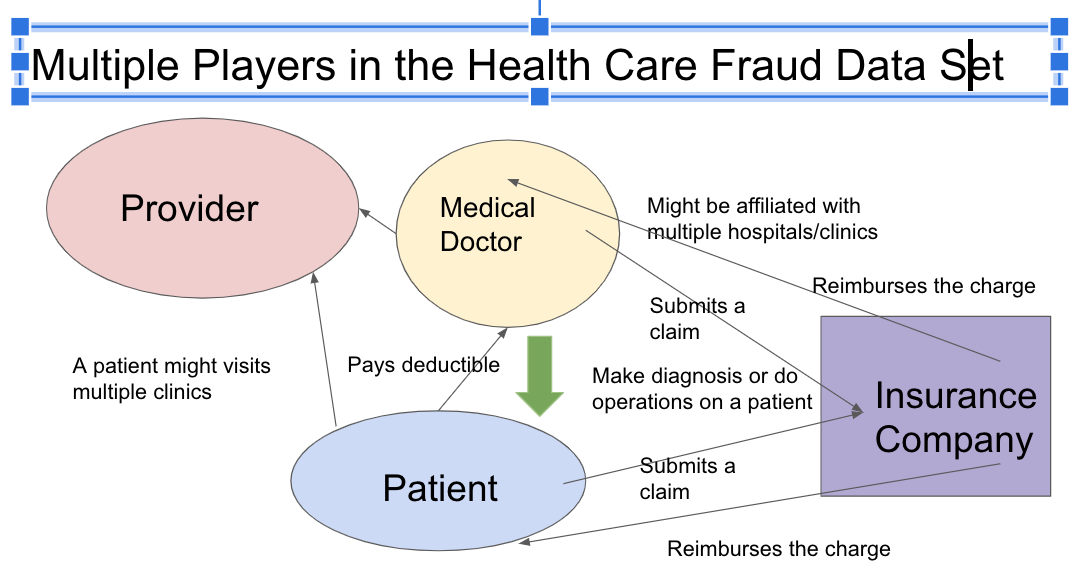

In [2]:
from IPython.display import Image
Image("Healthcare dataset players.png")

### Warmup Question 1:
- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? 
Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical
outpatient patients, or do those who have more visits to the providers have worse health conditions?
Provide an analysis on these issues.
- How many distinct patients (**BeneIDs**) are there in the in/out-patient datasets? 
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to
characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize
those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services?  Summarize your finding.


### Warmup Question 2:
- Study the relationship between the patient ages (at the time of their service) and the counts 
of medical claims.
- Study the relationship between the patient age and their chornic conditions.
Within the train-samples, do these chronic conditions show a definite trend with respect to increasing
 ages?
- In order to make sure the insurance premiums can cover the claims, the insurance company would 
need to categorize the patients according to their resource usage.
In answering the question that what types of patients would make more outpatient visits, please 
provide your finding.
- In answering what types of patients would make more inpatient service claims, please provide
your findings.
- From the prospect of the insurance company, the reimbursed amounts are their coverage on the
claims.  Please analyze the patterns of the total reimbursed amounts 
(or average reimbursed amounts/visit) vs different types of patients.
- From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing
to the providers. Based on this, analyze which types of patients contribute more to the 
providers in terms of the aggregate charges or the average charge per visit. 

### Warmup Question 3, Time Series Analysis:
- Based on the attribute **ClaimStartDt**, analyze the weekly service volume variations.
- What are the weekly patterns (weekly seasonalities) you observe for the demands on **inpatient** or **outpatient**
services?
- Identify the top $5$ most frequent **ClmAdmitDiagnosisCodes** and trace their weekly seasonalities.
Display the patterns you find.
- For the inpatient patients, is there any pattern between the durations of the treatments and
the patient attributes?
- For the monthly inpatient/outpatient claim counts of all the providers, please analyze the
table of provider-month matrices and report any interesting findings.

- **hint**: dataframe's pivot_table method could be used to construct the provider-month matrix.

### Warmup Question 4:
- Study the distributions of **InscClaimAmtReimbursed**, **DeductibleAmtPaid** 
for both inpatient and outpatient services. Your team might want to work with hist, scatter or sns.pairplot, distplot, etc.
- Study the distributions of 
insurance covered percentages **InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid)**.
- Study the distributions of the durations of average insurance claims (end-start) of the providers? 
Box-plot/violin-plot based on the **PotentialFraud** flag. Do you find any differences for none-potential fraud vs potential-fraud
providers?
- How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?
- Consider mean daily total charges (i.e. total charge/duration), please describe their distribution.
How do the **Potential Fraud** flag affect the distribution patterns?


### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify
the duplicated claims in the inpatients_train, outpatients_train data.
- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?
- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.
- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.
- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.
- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.
- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

### Market Basket Analysis (Associative Rule Mining)
- Traditionally in supermarkets or e-commerces, it is important to analyze the purchase patterns
    of their customers. For example, the retailers often want to know
     - what are the frequently purchased items?
     - conditioning on the purchasing of some item $A$ (or a set of items), 
    what other items $B$ are likely to be purchased in the same transaction?
- There are several terminologies used in **MBA**, like support, confidence, lift, conviction, which are
filtered based on the most popular **apriori** algorithm.
- **support**: sample probability of a pattern to occur in the dataset.
- **confidence**: the conditional probability of $P(B|A)={P(A,B)\over P{A}}$, where $A$, $B$ are
    two disjoint sets of items.
- **lift**: The measure of event independence $P(A,B)\over P(A)\cdot P(B)$.
- **conviction**: $P(\sim B)\over P(\sim B|A)$, which gauges whether $A\mapsto \sim B$ is purely by chance.
  $\sim B$ is the event that item sets in $B$ are **absent**, with $P(\sim B) = 1-P(B)$.  
- There are multiple python packages which handle **associative rule mining**, pip install 
**apyori** or **mlxtend** to start your **MBA**.
- In the following, we apply the machinery of **MBA** to analyze transaction-like data.

### Question on Unsupervised Market Basket Analysis: Extracting Information from the Patients' Chronic Conditions.
- The patients in this dataset often carry multiple pre-existing chronic conditions. They range from 
  - Alzheimer
  - Heartfailure
  - KidneyDisease
  - Cancer
  - ObstrPulmonary
  - Depression
  - Diabetes
  - IschemicHeart
  - Osteoporasis
  - Rheumatoidarthritis
  - Stroke
Please use **associative rules mining technique** to discover patterns with high supports, confidences and lifts.
This enables us to summarize the implication of different chronic conditions, say **diabetes**
patients are more likely to encounter **cancer** or **heart failure**.


### Associative Rule Mining: 
- Analyze the frequent Claim Diagnosis Codes/Procedure Codes and the **high confidence**
associative patterns.
- Conditioning on the types of pre-existing conditions of the patients, identify the **high confidence**
diagnosis codes/procedure codes/admit diagnosis codes. This enables us to identify the relationship between the pre-existing conditions and the diagnosis/procedure codes.

## Unsupervised Clustering
- We would like to study the affinity of the providers. We can **embed** the providers into some Euclidean
 space based on several ideas.
  - Base on the monthly claim patterns studied in the above **time series analysis**. 
  - Base on the **bag of words** model applied to the patients' inpatient/outpatient diagnosis codes/procedure codes
    or the patients' pre-existing chronic conditions.
- Because there are so many diagnosis/procedure codes, select the most frequent diagnosis codes as your features.    
- Basically each claim can be viewed as a 'document'. Each diagnosis/procedure code or a pre-existing
condition can be viewed as a 'term'. The idea of **bag-of-word** model allows us to generate
a 'document-term matrix' of word-counts.
- For the patient pre-existing chronic conditions, we may opt to treat multiple visits of the same patients
to the same provider as a single sample.

- Once we have a specified **provider** embedding, we may apply a clustering technique to
analyze the dis-similarities of the providers.
- Start with **kmeans**, **hierarchical clustering**, and extend into other clustering techniques.
- You may decide if you need to normalize the columns if necessary.
- Provide insights on how different providers behave similarly.
- How would you decide if your clustering result would have any relevance to identify **PotentialFraud**?


### Unsupervised Clinic/Doctor Network Analysis
- Even though the data set does not specify the relationship between different providers or doctors, we can
still use the provided dataset to identify their networks.

- We realize that the patients may visit multiple hospitals/clinics within the same insurance network.
- Often the doctors who know each other professionally would refer patients to each other.
- Many doctors are affiliated with multiple clinics/hospitals simutaneously.

- Base on these observations, we may link different providers, different doctors based on the
patients they share.
- We can also link medical providers based on the doctors they share.
- The linkages of different providers allow us to identify the neighbors of any provider.
- Intuitively, large hospitals should have many neighbors in the network graph. Conversly smaller clinic
may be more isolated. Are you able to identify different types of graph nodes based on their
connectivities with their neighbors?   Plot the number of patients vs the number of neighbors of
all the providers in a scatterplot and interpret the phenomenon.

- We realize that the above analysis is not complete, due to the limitation of the data size and data coverage.
Nevertheless, the technique still paints a vivid picture on how different clinics/hospitals or doctors
interact with each other.

- How do the connectivity network graphs provide risk factors of **potential fraud**?
- Does 'being a neighbor' to a potential fraud increase the chance for the provider to be 'fraud'?
- Are potential fraud providers completely isolated in the network, or they form certain 
clusters in the network?



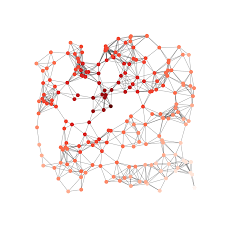

In [3]:
from IPython.display import Image
Image("An example of randomly generated network graph.png", height=500, width=500)


### Weighted Graphs and NetworkX
- In the above analysis, it is helpful to encode the relationships among different players (be it the providers, doctors)
 into a **weighted network graph**.
- The players are the nodes, and their mutual relationship is encoded as edges (links).
 The strengths of their interaction are assigned to be the associated weights.
- The well known **networkX** graph package allows us to visualize and analyze the graphs.
- Please pip install **networkx** and study its basic functionalities on weighted network 
graphs.
- For a tutorial on using **networkX**, visit https://networkx.github.io/documentation/stable/tutorial.html
- A short example of 'weighted graphs' can be found at https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

### Supervised Learning and Anomaly Detection
- Regression: Model **DeductibleAmtPaid** and **InscClaimAmtReimbursed** of each claim in terms of the other
claim, provider and patient features.
     - The deducible amounts for inpatient procedures are trivial to study. But it is interesting
    to build an estimation framework for inpatient reimbursement, outpatient duducible amount/reimbursement.
     - Evaluate whether your team would like to build individual models for individual targets or use scikit-learn's multi-target functionality to build joint model on the pairs (deducible, reimbursement).
     - Do the outliers in your regression model provide additional insights on the PotentialFraud?
     - If you use either the reimbursed amounts or the deducibles as your target, $RSS$ or $MSE$ 
    could be used as your loss function.  What if you have to transform the target by some type of
    box-cox transformation, say taking log?  In such a scenario, same size errors at the log scale
    translate to different losses in the original raw target.  How would you use the sample_weights
    to focus more on the large $\$$ claims?
- Classification: Model **PotentialFraud** flags on the providers based on creative feature 
    generations on the providers.
     - Because the **PotentialFraud** flag is imbalanced, try several imbalanced classification techniques and compare their pros and cons.
     - Because our dataset start with claims, it is crucial to derive multiple features (feature generation) from the raw data.
- The data analysis phase above illustrates a few ways to derive new features for the providers.
Some of them might be useful in building your classifiers.
- An alternative inspiration to feature generation is to walk through the types of frauds summarized 
by **Kaggle**. If you build an unsupervised model for any among the $5$ types of frauds, you may use the model output
as the new features for your classifier.
- Traditionally healthcare frauds are harder to detect, as the reliable fraud labels are hard to come by.
Our dataset circumvents the issue by introducing artificial **potential fraud** labels.
- One side-track is to use the unsupervised **anomaly detecion** framework (without using the
label information) to detect outliers of the data.
Compare your findings with the potential fraud labels to gauge its efficiency.  Both **SVMs** and
**RandomForests** have unsupervised analogues.



### The Different Roles of False Positives vs False Negatives
- Even for a provider which involves in fraudulent activities, the frauds might be a small fractions of
legitimate practices. To simplify our modeling process, we may **hypothesize** that the fraudulent
$\$$ amounts are a fixed fraction of the total claim amounts/fraudulent provider.

- Discuss the impact of **false negatives** and **false positives** on the economical losses 
due to mis-classification (assuming that **PotentialFraud** are the true labels of fradulent activities).

- Among the different metrics like **accuracy**, **AUC**, **F1**, ...., which serves your team's needs
better?  Visit https://scikit-learn.org/stable/modules/model_evaluation.html for the different model evaluation metrics supported by scikit-learn.

- An alternative approach is to perform the fraud detection as a two stage process.
    - In the stage one, caliber your classifier to have minimal false negatives.  
    - In the stage two, either use human labor to investigate the cases which are flagged 
    as fraud in the stage one process, or train a stage two classifer on these suspicious providers for the final fraud-flag outputs.
    - If your stage one classifier has $0$ false-negative, this means that it screens away
        many true-negative providers without missing any true-positive fradulent providers.
        In such a scenario, the stage-one classifier can serve as an effective downsample scheme.
    

In [8]:
import numpy as np 
import pandas as pd 
import scipy as sc
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import warnings    

warnings.filterwarnings("ignore")

from scipy import stats
%matplotlib inline


Train=pd.read_csv("csv/Train-1542865627584.csv")
Train_Inpatient=pd.read_csv("csv/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient=pd.read_csv("csv/Train_Outpatientdata-1542865627584.csv")
Train_Beneficiary=pd.read_csv("csv/Train_Beneficiarydata-1542865627584.csv")

Test=pd.read_csv("csv/Test-1542969243754.csv")
Test_Inpatient=pd.read_csv("csv/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient=pd.read_csv("csv/Test_Outpatientdata-1542969243754.csv")
Test_Beneficiary=pd.read_csv("csv/Test_Beneficiarydata-1542969243754.csv")

In [12]:
Train.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV52398,No
freq,1,4904


In [19]:
display(Train_Beneficiary.head(5))
display(Test_Beneficiary.head(5))

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,...,1,0,1,0,0,0,21260,2136,120,100


In [20]:
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] )
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],errors='ignore')
Train_Beneficiary['Age'] = ((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'])
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],errors='ignore')
Test_Beneficiary['Age'] = ((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365

In [29]:
print(Train_Inpatient.isna().sum())
print(Test_Inpatient.isna().sum())

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64
BeneID                     

In [31]:
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'])
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'])
Train_Inpatient['AdmitForDays'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days.abs())+1


Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'])
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'])
Test_Inpatient['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days.abs())+1


,AdmissionDt,DischargeDt,AdmitForDays
0,2009-04-12,2009-04-18,7
1,2009-08-31,2009-09-02,3
2,2009-09-17,2009-09-20,4
3,2009-02-14,2009-02-22,9
4,2009-08-13,2009-08-30,18
...,...,...,...
40469,2009-09-28,2009-10-02,5
40470,2009-11-03,2009-11-06,4
40471,2009-11-18,2009-11-22,5
40472,2009-12-17,2009-12-18,2


In [34]:
Train_patient_id = [i for i in Train_Outpatient.columns if i in Train_Inpatient.columns]
Train_Patient_data = pd.merge(Train_Inpatient, Train_Outpatient,
                    left_on = Train_patient_id,
                    right_on = Train_patient_id,
                    how = 'outer').\
          merge(Train_Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [35]:
Test_patient_id = [i for i in Test_Outpatient.columns if i in Test_Inpatient.columns]
Test_PatientData = pd.merge(Test_Inpatient, Test_Outpatient,
                    left_on = Test_patient_id,
                    right_on = Test_patient_id,
                    how = 'outer').\
          merge(Test_Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [50]:
Train_Patient_data['AdmitForDays'].fillna(0,inplace=True)

0

<AxesSubplot:xlabel='IPAnnualReimbursementAmt', ylabel='Density'>

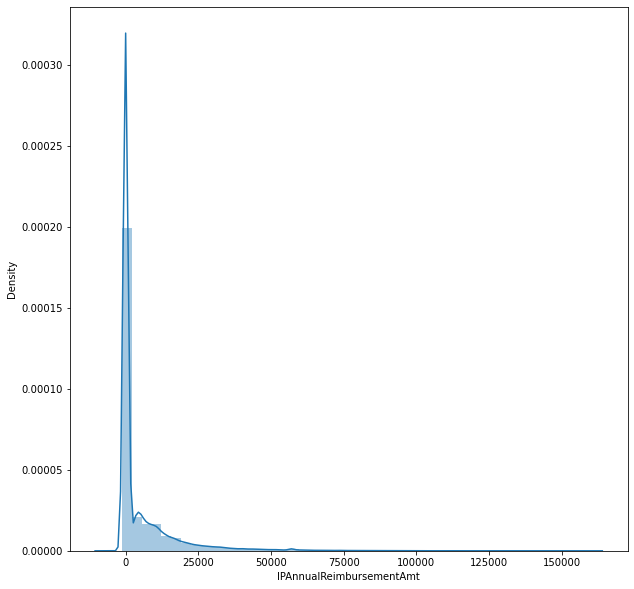

In [74]:
fig=plt.figure(figsize=(10,10))
sns.distplot(Train_Patient_data['IPAnnualReimbursementAmt'])

<AxesSubplot:xlabel='IPAnnualDeductibleAmt', ylabel='Density'>

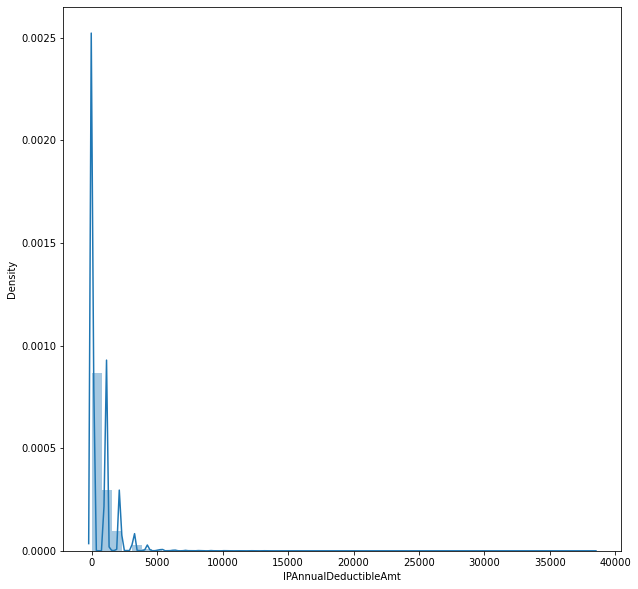

In [75]:
fig=plt.figure(figsize=(10,10))
sns.distplot(Train_Patient_data['IPAnnualDeductibleAmt'])

In [84]:
Train_count = Train_PatientData[['BeneID', 'ClaimID']].groupby(Train_PatientData['Provider']).nunique().reset_index()
Train_count.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

Test_count = Test_PatientData[['BeneID', 'ClaimID']].groupby(Test_PatientData['Provider']).nunique().reset_index()
Test_count.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

<AxesSubplot:xlabel='PotentialFraud', ylabel='AdmitForDays'>

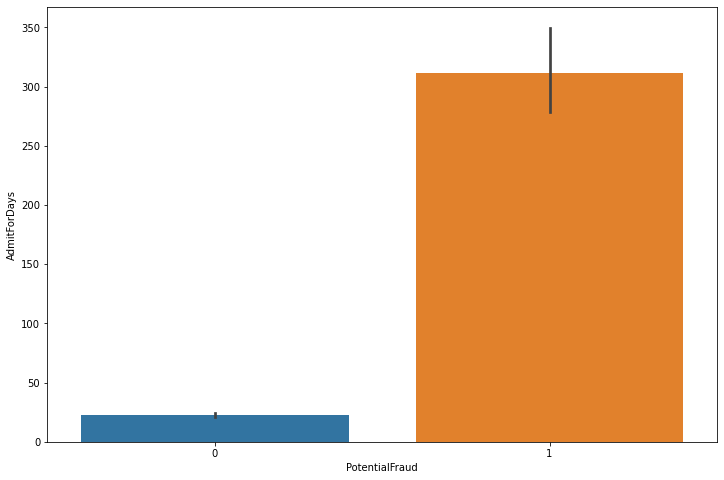

In [133]:
plt.figure(figsize=(12,8))
sns.barplot(Train_df["PotentialFraud"],Train_df["AdmitForDays"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='ClaimID_count'>

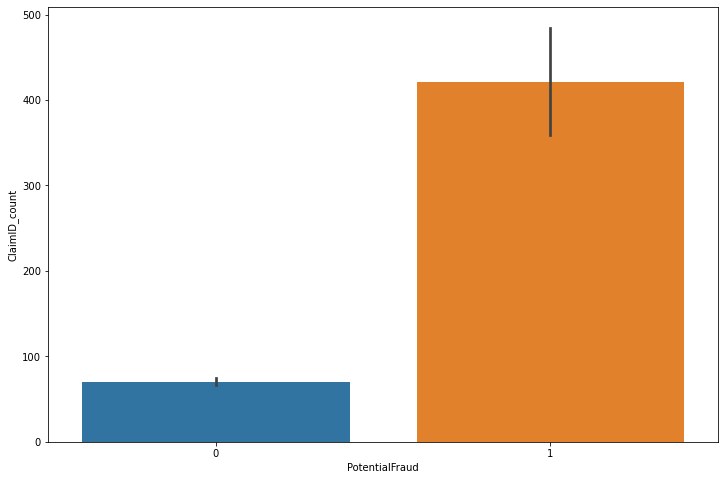

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(Train_df["PotentialFraud"],Train_df["ClaimID_count"])

In [89]:
def unique_values_N(df):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

Train_PatientData['n_Procedures'] = unique_values_N(Train_PatientData)

0    534901
1     17820
2      4521
3       851
4       109
5         9
Name: N_Procedure, dtype: int64

In [91]:
Train_Patient_data['n_UniqueDiagnosis_Claims'] = unique_values_N(Train_Patient_data)

1     152275
2     132264
3      86573
4      57288
5      30338
10     22219
9      20821
6      19652
7      13770
8      11576
0       8319
11      3116
Name: N_UniqueDiagnosis_Claims, dtype: int64

In [93]:
Test_PatientData['n_Procedures'] = unique_values_N(Test_PatientData)

In [95]:
Test_PatientData['n_UniqueDiagnosis_Claims'] = unique_values_N(Test_Patient_data)

In [96]:
Train_DataConsolidate = Train_PatientData.groupby(['Provider'], as_index = False)[[
    'AttendingPhysician','OperatingPhysician','OtherPhysician','AdmitForDays', 'IsDiagnosisCode', 'n_Procedures', 'n_UniqueDiagnosis_Claims'
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer',
    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary', 'ChronicCond_stroke','ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt']].sum()

Test_DataConsolidate = Test_PatientData.groupby(['Provider'], as_index = False)[[
    'AttendingPhysician','OperatingPhysician','OtherPhysician','AdmitForDays', 'IsDiagnosisCode', 'n_Procedures', 'n_UniqueDiagnosis_Claims'
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer',
    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary', 'ChronicCond_stroke','ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt']].sum()

In [99]:
Train_DataConsolidate['PotentialFraud']=np.where(Train_DataConsolidate.PotentialFraud == "Yes", 1, 0)

<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

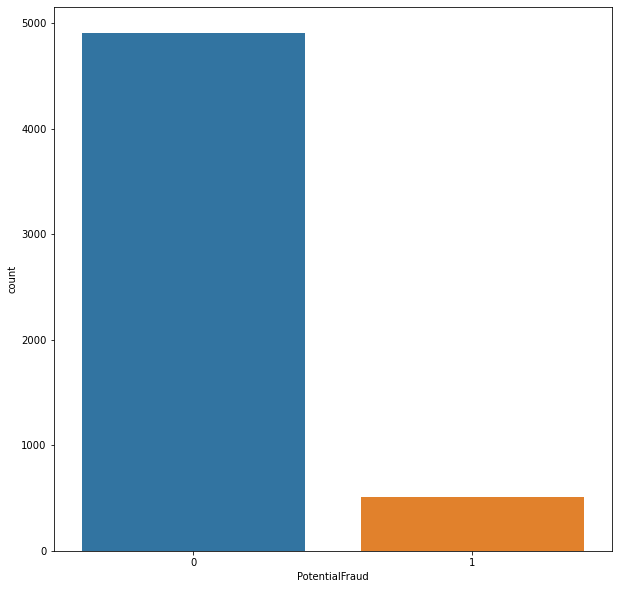

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(Train_df.PotentialFraud)

In [105]:
x=Train_DataConsolidate.drop("PotentialFraud",axis=1)
y=Train_DataConsolidate.PotentialFraud

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=50)

<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

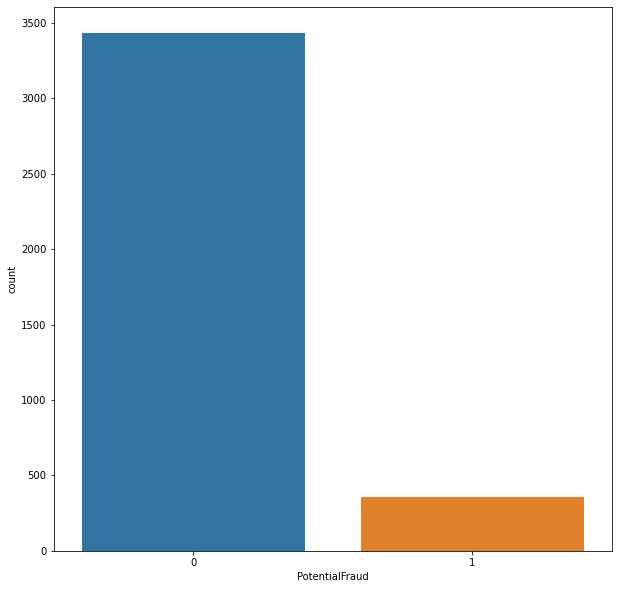

In [108]:
plt.figure(figsize=(10,10))
sns.countplot(y_train)

In [122]:
from imblearn.combine import SMOTETomek

os = SMOTETomek(0.8)

x_train_smote,y_train_smote = os.fit_resample(x_train,y_train)


The number of classes before fit Counter({0: 3432, 1: 354})
The number of classes after fit Counter({0: 3365, 1: 2678})


<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

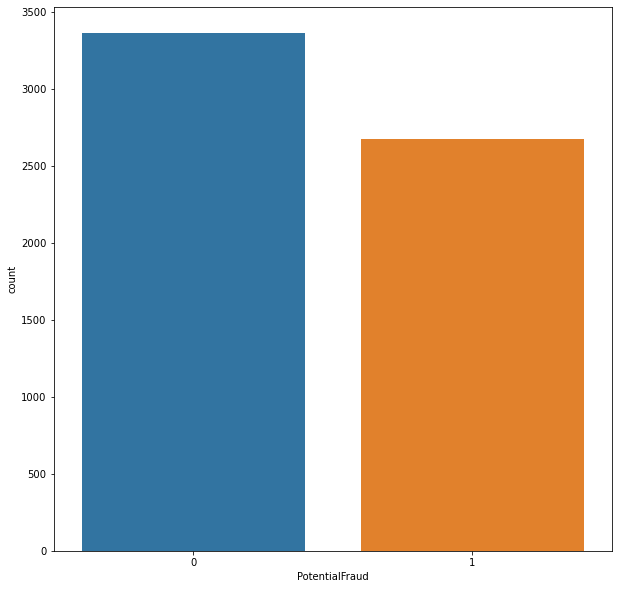

In [124]:
plt.figure(figsize=(10,10))
sns.countplot(y_train_smote)

In [125]:
GradientBoosting_Classifier = GradientBoostingClassifier()
GradientBoosting_Classifier_Model = GradientBoosting_Classifier.fit(x_train_smote,y_train_smote)
y_GradientBoosting_Prediction = GradientBoosting_Classifier_Model.predict(x_test)

print(confusion_matrix(y_test,y_GradientBoosting_Prediction))
print(accuracy_score(y_test,y_GradientBoosting_Prediction))
print(classification_report(y_test,y_GradientBoosting_Prediction))

Confusion Matrix 
 [[1345  127]
 [  26  126]]

 Accuracy Score 
 0.9057881773399015

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      1472
           1       0.50      0.83      0.62       152

    accuracy                           0.91      1624
   macro avg       0.74      0.87      0.78      1624
weighted avg       0.94      0.91      0.92      1624



In [9]:
RandomForest_Classifier = RandomForestClassifier()
RandomForest_Classifier_Model = RandomForest_Classifier.fit(x_train_smote,y_train_smote)
y_RandomForest_Prediction = RandomForest_Classifier_Model.predict(x_test)

print(confusion_matrix(y_test,y_RandomForest_Prediction))
print(accuracy_score(y_test,y_RandomForest_Prediction))
print(classification_report(y_test,y_RandomForest_Prediction))

NameError: name 'RandomForestClassifier' is not defined

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

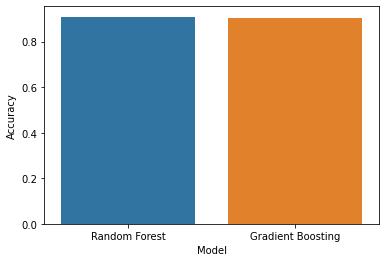

In [129]:
RandomForest_accuracy = accuracy_score(y_test,y_GradientBoosting_Prediction)
GradientBoosting_accuracy = accuracy_score(y_test,y_pred_GB)

AccuracyDF = pd.DataFrame({"Model":["Random Forest", "Gradient Boosting"],"Accuracy":[RandomForest_accuracy, GradientBoosting_accuracy]})
sns.barplot(x=AccuracyDF.Model,y=AccuracyDF.Accuracy)

In [8]:
#feature importance
importanceRank = list(RandomForest_Classifier_Model.feature_importances_).fetch(6)
feature_list = list(RandomForest_Classifier.columns).fetch(6)

feature_Rank = [(feature, importanceRank) for feature, importanceRank in df.combine(feature_list, importances)]

for feature in feature_Rank : 
    print(feature, importanceRank) 

InscClaimAmtReimbursed .5378270318276941
n_Procedures .2392646900348269 
AdmitForDays .0871962739882826 
n_UniqueDiagnosis_Claims .0444964130075943 
DeductibleAmtPaid .01721511584419107
Chronic Stroke .00728541197834728
